Shape: (776, 1254)


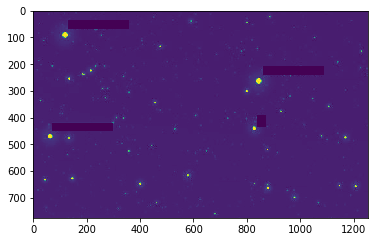

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys

os.chdir("/Users/Bacon/Desktop/")
img = cv2.imread('FixedTestImg.jpg', cv2.IMREAD_GRAYSCALE)
print("Shape:", img.shape)
plt.imshow(img)

sys.setrecursionlimit(100000)# It sets recursion limit to 10000.

In [9]:
def StarWalk(theImg, curRow, curCol, avgCol, avgRow, numOfPix):
   # print("Walk")
    #First, we start with our recursion break condition
    if theImg[curRow,curCol] ==0:
        return avgCol, avgRow, numOfPix

    # Update recursive variables
    avgCol += curCol      #Adding x and y to the average
    avgRow += curRow
    numOfPix += 1
    theImg[curRow,curCol] = 0


    # We now recurse 
    # Up
    try:
        rightAvgCol, rightAvgRow, rightNumOfPix = StarWalk(theImg, curRow+1, curCol, avgCol, avgRow, numOfPix)
    except IndexError:
        print("Edge case")
        
    # Right
    try:
        rightAvgCol, rightAvgRow, rightNumOfPix = StarWalk(theImg, curRow, curCol+1, avgCol, avgRow, numOfPix)
    except IndexError:
        print("Edge case")
        
    # Left
    try:
        leftAvgCol, leftAvgRow, leftNumOfPix = StarWalk(theImg, curRow, curCol-1, avgCol, avgRow, numOfPix)
    except IndexError:
        print("Edge case")
        
    # Down
    try:
        downAvgCol, downAvgRow, downNumOfPix = StarWalk(theImg, curRow-1, curCol, avgCol, avgRow, numOfPix)
    except IndexError:
        print("Edge case")
        
    # Add the values
    avgCol = avgCol + rightAvgCol + leftAvgCol + downAvgCol
    avgRow = avgRow + rightAvgRow + leftAvgRow + downAvgRow
    numOfPix = numOfPix + rightNumOfPix + leftNumOfPix + downNumOfPix

    return avgCol, avgRow, numOfPix

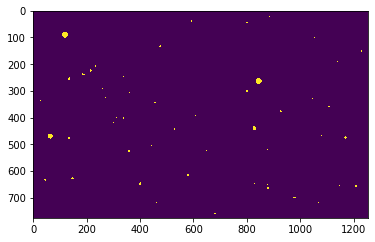

In [10]:
scale = 0.5

img = img/np.amax(img)

row = 0
col = 0
threshedImg = (img > scale).astype(int) * 255
#cv2_imshow(threshedImg)

plt.imshow(threshedImg)

In [11]:

totalRows = len(threshedImg)
totalColumns = len(threshedImg[0])

print("Rows:", totalRows)
print("Cols:", totalColumns)

curRow = 0
curCol = 0

starArray = []

# Check the rows
while curRow < totalRows:
  # Check the column

    while curCol < totalColumns:
        # Found a star
        if (threshedImg[curRow,curCol] != 0) :
           # print("\nSTAR")
          # Put together some variables to pass into StarWalk
            averageCol = 0
            averageRow = 0 
            numOfPix = 0

          # Begin the recursive function
            averageCol, averageRow, numOfPix = StarWalk(threshedImg, curRow, curCol, averageCol, averageRow, numOfPix)
           # print("STAR DONE")

          # Take the actual average
            averageCol = averageCol / numOfPix
            averageRow = averageRow / numOfPix

          # Save the values
            starArray.append((averageCol, averageRow, numOfPix))
        curCol+=1
        
    curRow+=1
    curCol=0
   # print("row", curRow)
    
    

print("\n\nStar Count:", len(starArray))


Rows: 776
Cols: 1254


Star Count: 57


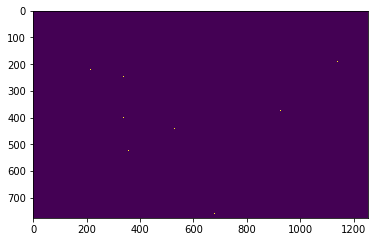

In [12]:

checkArray = np.zeros(threshedImg.shape).T
count = 0

for star in starArray:
    checkArray[int(star[0]), int(star[1])] = 255

plt.imshow(checkArray.T)


In [13]:
threshedImg.shape

(776, 1254)

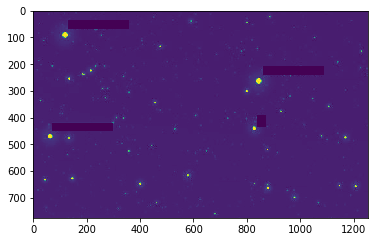

In [14]:
plt.imshow(img)

In [15]:
# Make arrays for values
xVals = []
yVals = []
for star in starArray:
    xVals.append(star[0])
    yVals.append(star[1])

# Get the differences
xDifferences = [abs(i-j) for i in xVals for j in xVals if i != j]
yDifferences = [abs(i-j) for i in yVals for j in yVals if i != j]

print(len(xDifferences))
print(len(yDifferences))


3184
3184


In [16]:
# Get the actual distances
index = 0
distances = []

while index < len(xDifferences):
    dist = (xDifferences[index]**2 + yDifferences[index]**2 )**(0.5)
    distances.append(dist)
    index+=1


In [17]:
count = 9000
sume = 0

while count !=0:
    sume= sume + count
    count = count-1
print(sume)

40504500


In [18]:
# load simmed image
simage = np.uint8(img)

# Get column and row count
cols = len(simage[0])
rows = len(simage)

# Select 2 random vertical and horizontal indices
tailCol = np.random.random_integers(0, cols)
headCol = np.random.random_integers(0, cols)

tailRow = np.random.random_integers(0, rows)
headRow = np.random.random_integers(0, rows)

tailPoint = (tailCol, tailRow)
headPoint = (headCol, headRow)

output = cv2.line(simage, tailPoint, headPoint, color=(0,255,0), thickness=14, lineType=8, shift=0)
#cv2.imshow("foo", simage)

/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(0, 1254 + 1) instead
  if __name__ == '__main__':
/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 1254 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: This function is deprecated. Please call randint(0, 776 + 1) instead
  if sys.path[0] == '':
/Users/Bacon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 776 + 1) instead
  del sys.path[0]


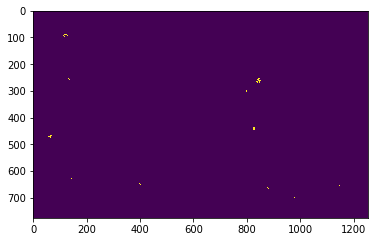

In [19]:
plt.imshow(output)

Shape: (423, 634)


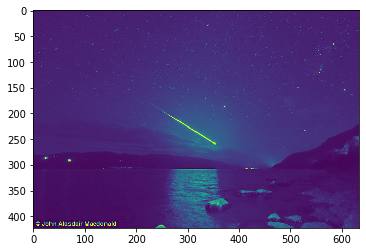

In [25]:

os.chdir("/Users/Bacon/Documents/Current Courses/Hackathon")
img = cv2.imread('baddy_test.jpg', cv2.IMREAD_GRAYSCALE)
print("Shape:", img.shape)
plt.imshow(img)



255


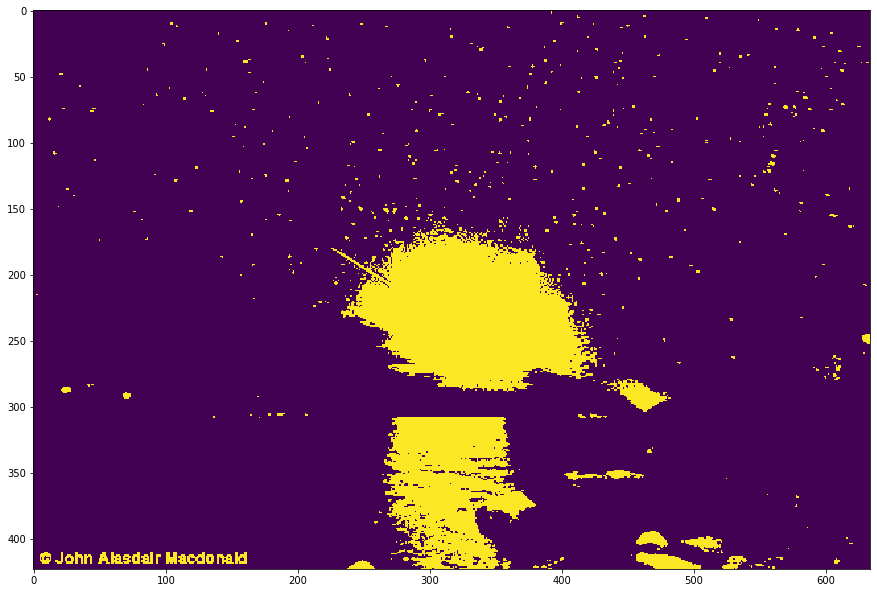

In [26]:
scale = 0.2

print(np.amax(img))
img = img/np.amax(img)

row = 0
col = 0
threshedImg = (img > scale).astype(int) * 255
#cv2_imshow(threshedImg)

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(threshedImg, interpolation='nearest')

In [27]:

totalRows = len(threshedImg)
totalColumns = len(threshedImg[0])

print("Rows:", totalRows)
print("Cols:", totalColumns)

curRow = 0
curCol = 0

starArray = []

# Check the rows
while curRow < totalRows:
  # Check the column

    while curCol < totalColumns:
        # Found a star
        if (threshedImg[curRow,curCol] != 0) :

          # Put together some variables to pass into StarWalk
            averageCol = 0
            averageRow = 0 
            numOfPix = 0

          # Begin the recursive function
            averageCol, averageRow, numOfPix = StarWalk(threshedImg, curRow, curCol, averageCol, averageRow, numOfPix)
           # print("STAR DONE")

          # Take the actual average
            averageCol = averageCol / numOfPix
            averageRow = averageRow / numOfPix

            # Save the values
            
            starArray.append((averageCol, averageRow, numOfPix))
        curCol+=1 
        
    curRow+=1
    curCol=0
   # print("row", curRow)
    
    

print("\n\nStar Count:", len(starArray))


Rows: 423
Cols: 634
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case
Edge case


(392.0, 1.0, 4)
(412.0, 4.0, 4)
(462.3636363636364, 4.0, 11)
(509.0, 5.0, 4)
(549.0, 7.0, 4)
(104.0, 9.0, 4)
(176.0, 9.0, 4)
(399.0, 9.0, 4)
(248.36363636363637, 10.0, 11)
(424.0, 10.0, 4)
(108.0, 11.0, 4)
(211.36363636363637, 11.0, 11)
(449.7142857142857, 11.0, 21)
(267.3636363636364, 12.0, 11)
(359.0, 12.0, 4)
(445.3636363636364, 13.0, 11)
(316.0, 14.0, 4)
(562.3636363636364, 14.0, 11)
(579.0, 14.0, 4)
(193.0, 15.0, 4)
(140.0, 17.0, 4)
(604.3636363636364, 17.0, 11)
(316.0, 19.0, 4)
(463.0, 19.0, 4)
(222.0, 20.0, 4)
(420.0, 20.0, 4)
(591.0, 20.0, 4)
(494.3636363636364, 22.0, 11)
(154.36363636363637, 23.0, 11)
(394.3636363636364, 23.0, 11)
(98.36363636363636, 25.0, 11)
(331.3636363636364, 25.0, 11)
(336.0, 27.0, 4)
(387.0, 27.0, 4)
(598.3636363636364, 27.0, 11)
(624.7142857142857, 27.0, 21)
(340.3636363636364, 28.0, 11)
(426.3636363636364, 29.0, 11)
(412.0, 30.0, 4)
(610.0, 30.0, 4)
(446.0, 32.0, 4)
(520.0, 32.0, 4)
(474.0, 33.0, 4)
(541.3636363636364, 33.0, 11)
(203.0, 34.0, 4)
(535.0

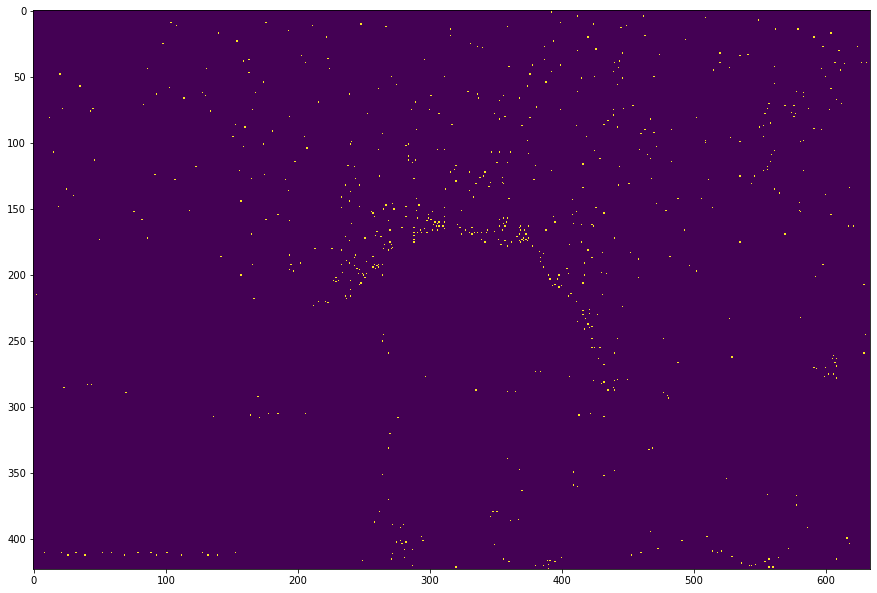

In [28]:

checkArray = np.zeros(threshedImg.shape).T
count = 0

for star in starArray:
    print(star)
    checkArray[int(star[0]), int(star[1])] = 255

    
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(checkArray.T, interpolation='nearest')

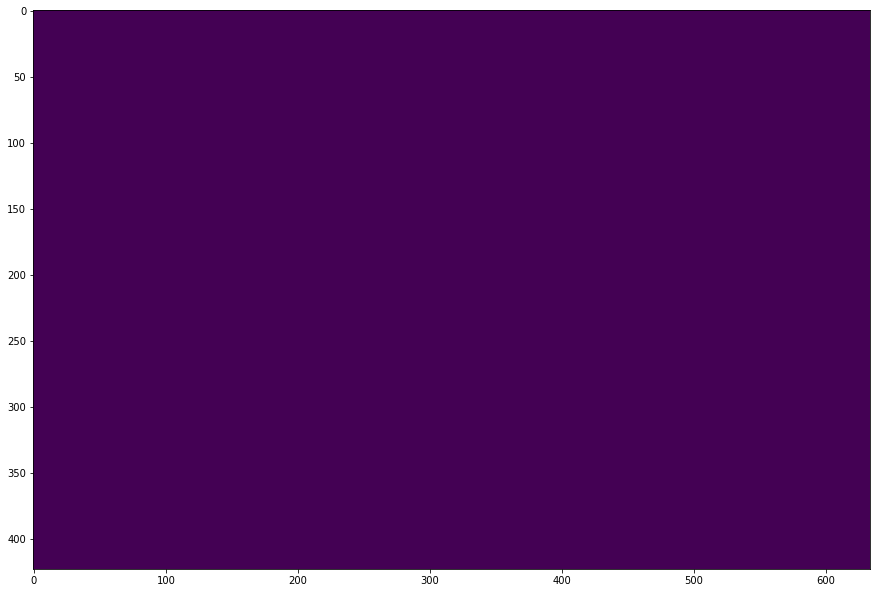

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(threshedImg, interpolation='nearest')

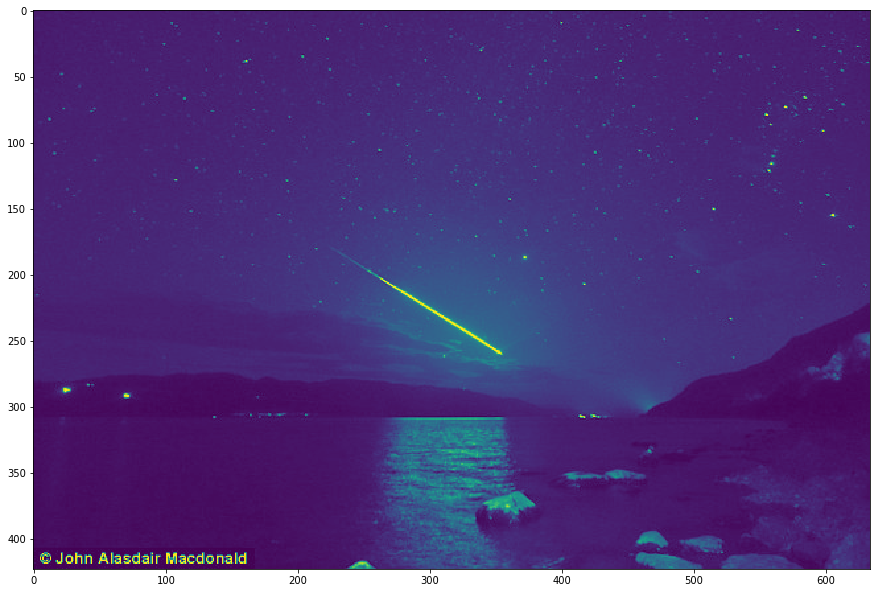

In [30]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img, interpolation='nearest')
